## Evaluating the global correctness of an image classifier using a generative model

This script takes as input a classifier and a generative model and evaluates the global correctness.
In addition to the number, the script produces a figure displaying 16 outliers.

In [10]:
import sys
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
import bisect
%matplotlib inline

digit = 8
number_samples = 1000

classifier = tf.keras.models.load_model('Models/classifier_capacity1_simple.model', compile=False)
gan = tf.keras.models.load_model('Models/gan_digit8_rich.h5')

In [11]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

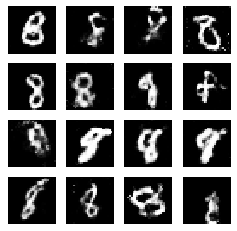

Global correctness: 92.20 %


In [12]:
fig = plt.figure(figsize=(4, 4))
        
plt.axis("off")

outliers = []

for i in range(number_samples):
    noise = np.random.normal(0,1,size=[1,10])
    generated_image = gan.predict(noise)
    generated_image = generated_image.reshape(1,28,28,1)
    output = classifier.predict(generated_image)[0]
    proba = softmax(output)
    prediction = np.argmax(proba)
    if prediction != digit:
        outliers.append((proba[digit], generated_image))

outliers.sort(key = lambda x : x[0], reverse=True)

for i in range(16):
    fig.add_subplot(4,4,i+1)
    plt.imshow(outliers[i][1][0].reshape(28,28),cmap='gray')
    plt.axis("off")
       
plt.savefig('outliers.png')
plt.show()

print("Global correctness: %.2f %%" % (100.0 * ((number_samples - len(outliers)) / number_samples)))